# Основы Python. Часть 8


## Математика и python: Библиотеки numpy, matplotlib

### Numpy
NumPy is the fundamental package for scientific computing with Python. It contains among other things:
1. a powerful N-dimensional array object
2. sophisticated (broadcasting) functions
3. tools for integrating C/C++ and Fortran code
4. useful linear algebra, Fourier transform, and random number capabilities

Оффициальный сайт: http://www.numpy.org/

Документация: https://docs.scipy.org/doc/numpy/reference/

Установка через pip:
`pip install numpy`

Установка через conda:
`conda install numpy`

Импорт библиотеки:

In [1]:
import numpy as np

### Создание массивов (arrays)

In [2]:
N = 3 #Длина массива

a = np.zeros(N)
print('Массив нулей float: {}'.format(a))

a = np.zeros(N, dtype= int)
#Другие форматы np.float32, np.float16, np.int64, np.int8
print('Массив нулей int: {}'.format(a))

a = np.ones(N)
print('Массив единичек: {}'.format(a))

a = np.random.rand(N)
print('Массив случайных чисел, равномерно распределенных в интервале [0, 1]: {}'.format(a))

a = np.random.randn(N)
print('Массив случайных чисел с нормальным распределением: {}'.format(a))

low  = 0
high = 100
size = 10
a = np.random.randint(low, high, size = size)
print('Массив случайных целых чисел от 0 до 100: {}'.format(a))

Массив нулей float: [0. 0. 0.]
Массив нулей int: [0 0 0]
Массив единичек: [1. 1. 1.]
Массив случайных чисел, равномерно распределенных в интервале [0, 1]: [0.51343856 0.96501665 0.86011279]
Массив случайных чисел с нормальным распределением: [ 0.10670105 -0.75821167 -0.75290171]
Массив случайных целых чисел от 0 до 100: [87 96 80 76 83 47 92  0 30 93]


In [3]:
type(a)

numpy.ndarray

#### Перевод из list, tuple в np.array и обратно

In [4]:
a = [1, 2, 4, 5, 6]
np.array(a)

array([1, 2, 4, 5, 6])

In [5]:
list(np.array([1,2,4]))

[1, 2, 4]

In [6]:
a = (1, 2, 4, 5, 6)
np.array(a)

array([1, 2, 4, 5, 6])

In [7]:
np.array(range(6))

array([0, 1, 2, 3, 4, 5])

In [8]:
a = [1, 'a', 4, 5, 6]
np.array(a)

array(['1', 'a', '4', '5', '6'], dtype='<U21')

In [9]:
#Linspace
N = 11
np.linspace(0,100,N)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [10]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
np.arange(1,10,1, dtype = np.int8)

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

### Создание матриц

In [13]:
N = 2
np.zeros(N,N)

TypeError: data type not understood

In [14]:
N = 2
np.ones((N,N))

array([[1., 1.],
       [1., 1.]])

In [15]:
np.array([[1,2,3],[4,5,6]],dtype = np.float32)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [16]:
np.random.randn(N,N)

array([[-0.25422772, -0.2142202 ],
       [ 0.31096118, -1.01362727]])

Как узнать размер np.array()

In [17]:
a = np.random.randn(3,4,2)
a

array([[[ 0.10457891, -1.10295617],
        [-1.42257662,  1.15257807],
        [ 1.45545112,  0.731163  ],
        [ 1.67708463,  1.29505503]],

       [[-1.5995074 , -1.60822417],
        [ 1.44568976,  0.04178681],
        [ 0.03802485,  0.93116478],
        [ 0.60425166,  0.87768428]],

       [[ 1.44960348,  0.79547737],
        [-2.51524275, -0.04266118],
        [-0.28082723,  0.00625357],
        [-1.57962065, -0.70586539]]])

In [18]:
print(a.size)  #Кол-во элементов всего
print(len(a))  #Кол-во элементов во внешнем массиве
print(a.shape) #Все размерности

24
3
(3, 4, 2)


### Обращение по индексу, slice

In [19]:
a = np.arange(1,20,1)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [20]:
a[:]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [21]:
a[10:14]

array([11, 12, 13, 14])

In [22]:
a[10::2]

array([11, 13, 15, 17, 19])

В качестве индексов можно также использовать np.array

In [23]:
a[np.arange(2,5)]

array([3, 4, 5])

In [24]:
a[a > 10]

array([11, 12, 13, 14, 15, 16, 17, 18, 19])

Поиск индексов элементов np.array, удолетворяющие заданному: 

In [25]:
np.where(a > 10)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18]),)

### Сложение и умножение

К list нельзя добавить число 

In [26]:
a = list(range(5))
print(a)
a + 1

[0, 1, 2, 3, 4]


TypeError: can only concatenate list (not "int") to list

Можно сделать вот так:

In [27]:
def addition(my_list, number):
    for i in range(len(my_list)):
        my_list[i] += number

a = list(range(5))
print(a)
addition(a,1)
print(a)

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]


В numpy к array можно добавить 1 ко всем элементам

In [28]:
a = np.arange(5)
a + 1

array([1, 2, 3, 4, 5])

In [29]:
a = np.arange(5)
print(a, a.dtype)
b = 3.5
c = a * b
print(c, c.dtype)

[0 1 2 3 4] int64
[ 0.   3.5  7.  10.5 14. ] float64


При сложении двух array их размеры должны совпадать

In [30]:
a = np.arange(5)
b = np.arange(2)
a + b

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

In [31]:
2*np.ones(5) + 3*np.ones(5)

array([5., 5., 5., 5., 5.])

При складывании двух list'ов, они объдинятся в один

In [32]:
a = [2,2,2,2,2]
a + a

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [33]:
m1 = [[1,2,3],[4,5,6]]
m2 = [[9,8,7],[-1,-2,-3]]
m1 + m2

[[1, 2, 3], [4, 5, 6], [9, 8, 7], [-1, -2, -3]]

In [34]:
np.array(m1) + np.array(m2) 

array([[10, 10, 10],
       [ 3,  3,  3]])

In [35]:
a = np.array([1,2,3])
b = np.array([4,5,6])

Поэлементное перемножение:

In [36]:
a * b

array([ 4, 10, 18])

Произведение двух векторов

In [37]:
a @ b == a.dot(b) == np.dot(a,b)
np.dot(a,b)

32

In [38]:
H1,W1 = 2,3
H2,W2 = 3,4
a = np.ones((H1,W1))
b = np.ones((H2,W2))
print(a,'\n\n',b)
a.dot(b)

[[1. 1. 1.]
 [1. 1. 1.]] 

 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


array([[3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [39]:
np.dot(a,b)

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [40]:
np.dot(b,a)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)

In [41]:
a * b

ValueError: operands could not be broadcast together with shapes (2,3) (3,4) 

### Методы

#### Сумма

In [42]:
a = np.random.rand(2,2,2)
a

array([[[0.46771426, 0.43088383],
        [0.45801708, 0.73110562]],

       [[0.13280493, 0.01668904],
        [0.29748035, 0.88094317]]])

In [43]:
a.sum()

3.4156382624989092

In [44]:
a.sum(axis = 0)

array([[0.60051919, 0.44757287],
       [0.75549742, 1.61204878]])

In [45]:
#Проверка
a[0,0,0] + a[1,0,0] == a.sum(axis = 0)[0,0] 

True

In [46]:
a.sum(axis = 1)

array([[0.92573134, 1.16198945],
       [0.43028527, 0.8976322 ]])

In [47]:
a.sum(axis = 2)

array([[0.8985981 , 1.1891227 ],
       [0.14949396, 1.17842351]])

In [48]:
#Проверка
print(a[0,0,0] + a[0,1,0] == a.sum(axis = 1)[0,0])
#Проверка
print(a[0,0,0] + a[0,0,1] == a.sum(axis = 2)[0,0])

True
True


In [49]:
a.sum(axis = (0,2))

array([1.04809206, 2.36754621])

In [50]:
np.sum(a) == a.sum()

True

#### Среднее и среднеквадратичное отклонение

In [51]:
a = np.random.rand(2,2,2)
a.mean(axis = 0)

array([[0.58848657, 0.7111576 ],
       [0.8249635 , 0.52446626]])

In [52]:
a.std(axis= 0)

array([[0.10897338, 0.16433502],
       [0.07538733, 0.09556542]])

#### Максимум и минимум

In [53]:
a.max(), a.min()

(0.9003508316275723, 0.42890083887360786)

In [54]:
a.max(axis = 1)

array([[0.90035083, 0.87549262],
       [0.74957616, 0.54682259]])

#### Модуль

In [55]:
a = np.random.rand(2,2,2) - 1
a

array([[[-0.86942186, -0.84041158],
        [-0.28635499, -0.40658602]],

       [[-0.75414368, -0.72044513],
        [-0.8059782 , -0.20585453]]])

In [56]:
np.abs(a)

array([[[0.86942186, 0.84041158],
        [0.28635499, 0.40658602]],

       [[0.75414368, 0.72044513],
        [0.8059782 , 0.20585453]]])

### Корень

In [57]:
np.sqrt(np.abs(a))

array([[[0.93242794, 0.91673965],
        [0.53512147, 0.63764098]],

       [[0.86841446, 0.84879039],
        [0.89776289, 0.45371194]]])

#### Интегрирование методом трапеций

<img src="python_8_files/img.png" width="200">

In [58]:
a = np.ones(10)
print(a)
dx = 0.5
np.trapz(a, dx = dx) 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


4.5

Для более сложных способов интегрирования можно использовать `scipy.integrate` https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

### Решение системы линейный уравнений
Система линейных уравнений:

\begin{cases} 3x + 5y + z = 0\\ 7x – 2y + 4z  = 6\\ -6x + 3y + 2z  = 7\end{cases}

Матричная форма записи:

$$ A = \begin{pmatrix} 3 & 5 & 1\\ 7 & -2 & 4 \\ -6&3&2 \end{pmatrix}, x = \begin{pmatrix} x\\ y\\ z\end{pmatrix} , b = \begin{pmatrix} 0\\ 6\\ 7\end{pmatrix}   $$

$$A  \times x = b$$

Решение:

$$x = A^{-1} \times b$$

$A^{-1}$ - обратная матрица

In [59]:
A = np.array([[3,5,1], [7,-2, 4], [-6, 3 ,2]])
b = np.array([0,6,7])
# np.linalg.solve - метод для решения системы линейных уравнений, записанной в матричном виде
x = np.linalg.solve(A, b)
print(x)

[-0.48908297 -0.16157205  2.27510917]


In [60]:
# np.linalg.inv - метод возвращающий обратную матрицу
np.linalg.inv(A).dot(b)

array([-0.48908297, -0.16157205,  2.27510917])

### Numpy array и математические функции

In [61]:
x = np.arange(-10,10,1)
f = lambda x, a=1, b=3, c =2: a*x**2 + b*x + c
y = f(x)
y_noise = y + np.random.randn(len(y)) * 4

In [62]:
f(list([x]))

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Для построения пользуемся библиотекой `matplotlib.pyplot`

In [63]:
import matplotlib.pyplot as plt
% matplotlib inline
#magic команда для вывода изображений в notebook

Text(0,0.5,'y')

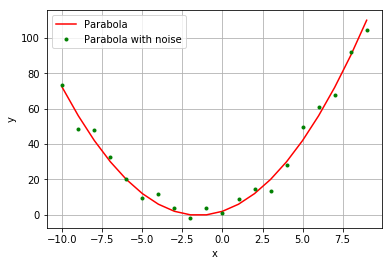

In [64]:
plt.plot(x,y, 'r-', label = 'Parabola') #r - red,
plt.plot(x,y_noise, 'g.', label = 'Parabola with noise') #r - red,
plt.legend()                            ##Добавялем подписи графиков
plt.grid()                              #Добавялем сетку
plt.xlabel('x')                         #Подпись оси X
plt.ylabel('y') 

Как найти коэффициенты a, b, c зная (x,y)?
$$L_2(a,b,c) = \sum_{i}^{N}{(a x_i^2 + b x_i + c - y_i)^2} \rightarrow \min\limits_{a,b,c}$$

Cпособ 1 (для полиномиальных аппроксимаций):

In [65]:
np.polyfit(x, y_noise, 2)

array([0.96969558, 2.90404585, 3.61391806])

Cпособ 2 (для любых апроксимаций):

In [66]:
from scipy import optimize

f_p = lambda x, a, b, c: a*x**2 + b*x + c

popt, _ = optimize.curve_fit(f_p,x,y_noise)
popt

array([0.96969558, 2.90404585, 3.61391795])

### Функции многих переменных

Пример взят с https://matplotlib.org/mpl_toolkits/mplot3d/tutorial

In [67]:
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
f = lambda x, y : np.sin(np.sqrt(x**2 + y**2))
x.shape,y.shape, f(x,y).shape

((40,), (40,), (40,))

In [68]:
# Cоздаём сетку
X, Y = np.meshgrid(x, y)
# Считаем знчаение для каждой точки в сетке
Z = f(X,Y)

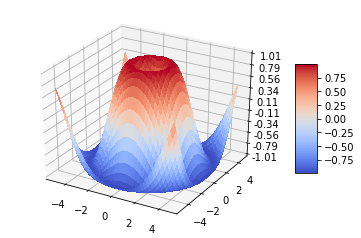

In [69]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#Создаём фигуру
fig = plt.figure()
#Выбираем проекции
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Векторизация функций

In [70]:
f = lambda a,b: a - b if a > b else a + b

In [71]:
f(1,3)

4

In [72]:
a = np.random.rand(10)
b = np.random.rand(10)

In [73]:
f(a,b)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [74]:
g = np.vectorize(f) #Векторизация функций

In [75]:
g(a,b) #После векторизации принимает на вход numpy.array

array([0.74627462, 0.18114886, 0.30807789, 1.22157623, 0.72285824,
       0.23938715, 0.31956596, 0.31688825, 1.12243708, 0.46645196])

In [76]:
#Второй способ векторизации функций
@np.vectorize
def f(x):
    if x > 0.5:
        return 1
    else:
        return 0 

In [77]:
a = np.random.rand(10)
f(a)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0])

#### Фурье-преобразование

В общем смысле:
$${\hat {f}}(\omega )={\frac {1}{{\sqrt {2\pi }}}}\int \limits _{{-\infty }}^{{\infty }}f(x)e^{{-ix\omega }}\,dx$$

Дискретное преобразование Фурье:

$$\displaystyle X_{k}=\sum _{n=0}^{N-1}x_{n}e^{-{\frac {2\pi i}{N}}kn}$$

In [78]:
N = 1001
t = np.linspace(0,10,N)
dt = t[1] - t[0]
y = 10*np.sin(2*np.pi*10*t) + 5*np.cos(2*np.pi*t)
noise = np.random.randn(len(y)) * 4
y_noised = y + noise

In [79]:
t[1]

0.01

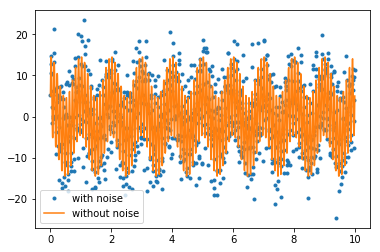

In [80]:
plt.plot(t,y_noised,'.', label = 'with noise')
plt.plot(t,y,'-', label = 'without noise')
plt.legend()

In [81]:
from numpy import fft

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Спектр нормализованный')

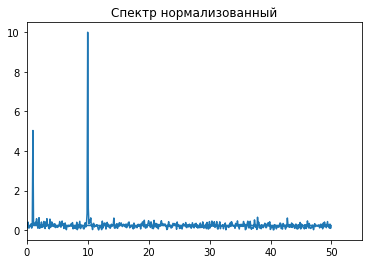

In [83]:
fourier = fft.fft(y_noised)
freq = np.fft.fftfreq(N, d=dt)
normed_fourier = 2*np.abs(fourier)/N
plt.plot(freq, normed_fourier)
plt.xlim(xmin = 0)
plt.title('Спектр нормализованный')

Text(0.5,1,'Fig.2')

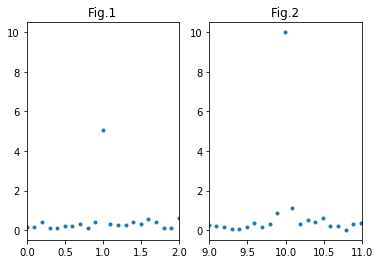

In [84]:
#Cоздаём сетку из фигур: 
plt.subplot(1,2,1) # 1 - кол-во строк, 2 - кол-во столбцов, 1 - номер подфигуры
plt.plot(freq, normed_fourier, '.')
plt.xlim((0,2))
plt.title('Fig.1')

plt.subplot(1,2,2) # 1 - кол-во строк, 2 - кол-во столбцов, 1 - номер подфигуры
plt.plot(freq, normed_fourier, '.')
plt.xlim((9,11))
plt.title('Fig.2')

In [85]:
freq[np.where(normed_fourier > 4)]

array([ 0.999001  ,  9.99000999, -9.99000999, -0.999001  ])

## Как достать данные для обработки?

In [86]:
import pandas as pd

In [87]:
dataframe = pd.read_csv('./python_8_files/data.csv', sep = ',',usecols = ['W'])

In [88]:
dataframe.head(5)

,W
0,0.022441
1,0.022440
2,0.022441
3,0.022442
4,0.022444


In [89]:
dataframe.columns

Index(['W'], dtype='object')

In [90]:
y = dataframe['W'].values
f_samples = 5200 #Hz
dt = 1/f_samples
t = np.arange(len(y))*dt

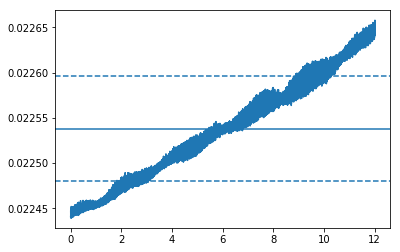

In [91]:
plt.plot(t,y,'-')
plt.axhline(y = y.mean())
plt.axhline(y = (y.mean() + y.std()), ls = '--')
plt.axhline(y = (y.mean() - y.std()), ls = '--')

In [92]:
dataframe.to_csv('./python_8_files/data1.csv') # Экспорт dataframe в файл

Как прочесть файл, размер которого превышает объём оперативки?

1 способ через Pandas:
```
import pandas as pd
df_iterator = pd.read_csv(filepath, compression='gzip', chunksize=your_chunksize_here)
for df in df_iteraror:
    do_processing()
```

2 cпособ:

Использовать HDF5 format: http://www.pytables.org/
